In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from gapminder import gapminder

## Load the gapminder data
We load the data and look at the population development of a few example countries

In [2]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
gapminder.year.min(), gapminder.year.max()

(1952, 2007)

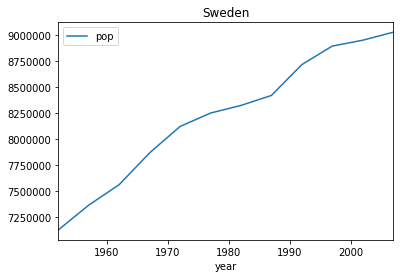

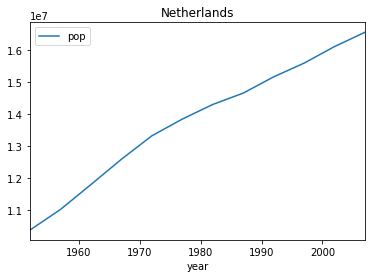

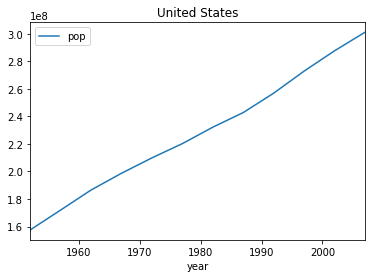

In [4]:
for country in ['Sweden', 'Netherlands', 'United States']:
    df_country = gapminder[gapminder.country==country]
    df_country.plot(x='year', y='pop')
    plt.title(country)

## Exponential model
A popular model for population growth is the exponential growth model:

`P(t) = P_0 e^(k(t-t_0))`

Let's define this as a function, where dt=t-t0:

In [5]:
import numpy as np

def model_exponential(dt, p0, k):
    return p0 * np.exp(k*dt)

We try to fit acurve for the US. We use the first and last points to guess p0 and k.

Guess for p0: 157553000
Guess for k: 0.011778421587289244


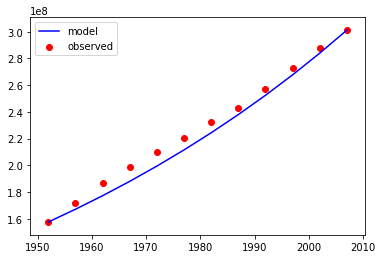

In [24]:
df_us = gapminder[gapminder.country=='United States'].sort_values('year')

t = df_us['year'].values
dt = t - t.min()

y_observed = df_us['pop'].values

# Initial guess for paramters:
p0 = y_observed.min()
k = np.log(y_observed[-1]/p0)/dt[-1]

print('Guess for p0: {}'.format(p0))
print('Guess for k: {}'.format(k))

y_guessed = model_exponential(dt, p0, k)

plt.plot(t, y_guessed, label='model', color='blue')
plt.scatter(t, y_observed, label='observed', color='red')
plt.legend()
plt.show()

Now we will use the curve fitting method of scipy. We can give it our inital guesses of the parameters.

In [17]:
from scipy.optimize import curve_fit

In [18]:
(p0_fitted, k_fitted), pcov = curve_fit(model_exponential, dt, y_observed, p0=[p0, k])

In [19]:
print(p0_fitted, k_fitted)

165186819.34609535 0.011094163737828887


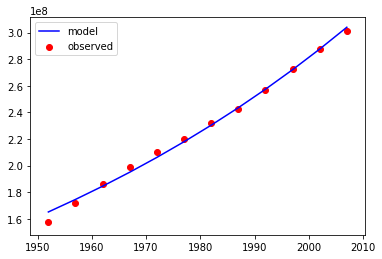

In [25]:
y_fitted = model_exponential(dt, p0_fitted, k_fitted)
plt.plot(t, y_fitted, label='model', color='blue')
plt.scatter(t, y_observed, label='observed', color='red')
plt.legend()
plt.show()

## Logistic growth model
The logistic growth model models an S curve, as opposed to the J curve (ever growing more!) of the exponential model. It's modeled by:

`P(t) = P_m / (1 + (P_m / P_0 - 1) e^(-k(t-t0)))`


Note that next to the initial population size P0, we also have the parameter P_m denoting the maximum population
Again, with dt = t - t0, we can define a function:

In [33]:
def model_logistic(dt, p0, pm, k):
    return pm / (1 + (pm/p0 - 1) * np.exp(-k*dt))

Again we can make initial guesses:

Guess for p0: 157553000
Guess for pm: 301139947
Guess for k: 0.03634666540300113


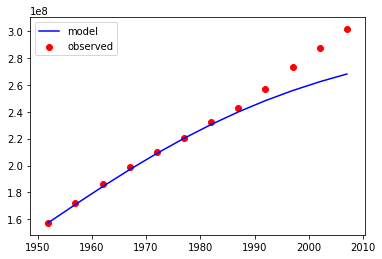

In [50]:
p0 = y_observed.min()
pm = y_observed.max()

# For k, rewriting gives k = -log((p0*(pm-pt)/(pt*(pm-p0))) / dt . so pick something in the middle
i = 5
pt = y_observed[i]
k = -np.log(p0*(pm-pt)/(pt*(pm-p0)))/dt[i]

print('Guess for p0: {}'.format(p0))
print('Guess for pm: {}'.format(pm))
print('Guess for k: {}'.format(k))

y_guessed = model_logistic(dt, p0, pm, k)

plt.plot(t, y_guessed, label='model', color='blue')
plt.scatter(t, y_observed, label='observed', color='red')
plt.legend()
plt.show()

In [43]:
(p0_fitted, pm_fitted, k_fitted), pcov = curve_fit(model_logistic, dt, y_observed, p0=[p0, pm, k])

In [45]:
print(p0_fitted, pm_fitted, k_fitted)

161519616.67852855 614264705.71144 0.017920135943989817


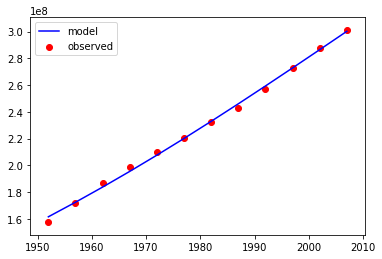

In [46]:
y_fitted = model_logistic(dt, p0_fitted, pm_fitted, k_fitted)
plt.plot(t, y_fitted, label='model', color='blue')
plt.scatter(t, y_observed, label='observed', color='red')
plt.legend()
plt.show()